In [1]:
# -*- coding: utf-8 -*-
"""
Risk Analytics EDA Assignment
"""

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('ggplot')
sns.set_style('whitegrid')

In [2]:
# Load the datasets
# --- IMPORTANT ---
# Replace 'Downloads/' with the actual path to your files if they are not
# in a 'Downloads' subdirectory within your current working directory.
try:
    app_df = pd.read_csv('Downloads/application_data.csv')
    prev_app_df = pd.read_csv('Downloads/previous_application.csv')
    col_desc = pd.read_csv('Downloads/columns_description.csv')
except FileNotFoundError:
    print("Error: Make sure 'application_data.csv', 'previous_application.csv', and 'columns_description.csv' are in the 'Downloads' directory or update the path.")
    # As a fallback for demonstration, I will try loading without 'Downloads/'
    try:
        app_df = pd.read_csv('application_data.csv')
        prev_app_df = pd.read_csv('previous_application.csv')
        col_desc = pd.read_csv('columns_description.csv')
        print("Loaded files from the current directory.")
    except FileNotFoundError:
        print("Could not find the files. Please check the file paths.")
        exit() # Exit if files can't be loaded

# Display basic information about application_data
print("Application Data Info:")
app_df.info(verbose=False) # Use verbose=False for a summary

print("\nApplication Data Shape:", app_df.shape)
print("\nApplication Data Head:")
print(app_df.head())

# Display basic information about previous_application_data
print("\nPrevious Application Data Info:")
prev_app_df.info(verbose=False)
print("\nPrevious Application Data Shape:", prev_app_df.shape)
print("\nPrevious Application Data Head:")
print(prev_app_df.head())

Application Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB

Application Data Shape: (307511, 122)

Application Data Head:
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    1350

In [3]:
# Function to calculate missing value percentages
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

# Get missing values for application_data
missing_app_data = missing_values_table(app_df)
print("\nTop 15 Missing Columns in application_data:")
print(missing_app_data.head(15))

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.

Top 15 Missing Columns in application_data:
                          Missing Values  % of Total Values
COMMONAREA_MEDI                   214865               69.9
COMMONAREA_AVG                    214865               69.9
COMMONAREA_MODE                   214865               69.9
NONLIVINGAPARTMENTS_MEDI          213514               69.4
NONLIVINGAPARTMENTS_MODE          213514               69.4
NONLIVINGAPARTMENTS_AVG           213514               69.4
FONDKAPREMONT_MODE                210295               68.4
LIVINGAPARTMENTS_MODE             210199               68.4
LIVINGAPARTMENTS_MEDI             210199               68.4
LIVINGAPARTMENTS_AVG              210199               68.4
FLOORSMIN_MODE                    208642               67.8
FLOORSMIN_MEDI                    208642               67.8
FLOORSMIN_AVG                     208642               67.8
YEARS_BUILD_MODE           

In [4]:
# Identify columns to remove (threshold 40%)
missing_threshold = 40
cols_to_remove = missing_app_data[missing_app_data['% of Total Values'] > missing_threshold].index.tolist()

print(f"\nNumber of columns to remove: {len(cols_to_remove)}")

# Remove these columns
app_df_cleaned = app_df.drop(columns=cols_to_remove)
print(f"Shape after removing high-missing columns: {app_df_cleaned.shape}")

# Recheck missing values
missing_app_data_cleaned = missing_values_table(app_df_cleaned)
print("\nTop 15 Missing Columns After Removal:")
print(missing_app_data_cleaned.head(15))


Number of columns to remove: 49
Shape after removing high-missing columns: (307511, 73)
Your selected dataframe has 73 columns.
There are 18 columns that have missing values.

Top 15 Missing Columns After Removal:
                            Missing Values  % of Total Values
OCCUPATION_TYPE                      96391               31.3
EXT_SOURCE_3                         60965               19.8
AMT_REQ_CREDIT_BUREAU_YEAR           41519               13.5
AMT_REQ_CREDIT_BUREAU_QRT            41519               13.5
AMT_REQ_CREDIT_BUREAU_MON            41519               13.5
AMT_REQ_CREDIT_BUREAU_WEEK           41519               13.5
AMT_REQ_CREDIT_BUREAU_DAY            41519               13.5
AMT_REQ_CREDIT_BUREAU_HOUR           41519               13.5
NAME_TYPE_SUITE                       1292                0.4
DEF_60_CNT_SOCIAL_CIRCLE              1021                0.3
OBS_60_CNT_SOCIAL_CIRCLE              1021                0.3
DEF_30_CNT_SOCIAL_CIRCLE              102

In [5]:
# Impute AMT_ANNUITY with median
median_annuity = app_df_cleaned['AMT_ANNUITY'].median()
app_df_cleaned['AMT_ANNUITY'].fillna(median_annuity, inplace=True)

# Impute CNT_FAM_MEMBERS with median
median_fam = app_df_cleaned['CNT_FAM_MEMBERS'].median()
app_df_cleaned['CNT_FAM_MEMBERS'].fillna(median_fam, inplace=True)

# Impute DAYS_LAST_PHONE_CHANGE with median
median_phone = app_df_cleaned['DAYS_LAST_PHONE_CHANGE'].median()
app_df_cleaned['DAYS_LAST_PHONE_CHANGE'].fillna(median_phone, inplace=True)

# Impute EXT_SOURCE_3 with median
median_ext3 = app_df_cleaned['EXT_SOURCE_3'].median()
app_df_cleaned['EXT_SOURCE_3'].fillna(median_ext3, inplace=True)

# Impute AMT_REQ_CREDIT_BUREAU_* with median
for col in ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']:
    median_val = app_df_cleaned[col].median()
    app_df_cleaned[col].fillna(median_val, inplace=True)

# Impute NAME_TYPE_SUITE with mode
mode_suite = app_df_cleaned['NAME_TYPE_SUITE'].mode()[0]
app_df_cleaned['NAME_TYPE_SUITE'].fillna(mode_suite, inplace=True)

# Impute OCCUPATION_TYPE with 'Unknown' (or mode, 'Unknown' is often better)
app_df_cleaned['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)


# Final check
print("\nMissing values after imputation:")
print(app_df_cleaned.isnull().sum().sort_values(ascending=False).head())


Missing values after imputation:
OBS_30_CNT_SOCIAL_CIRCLE    1021
DEF_30_CNT_SOCIAL_CIRCLE    1021
OBS_60_CNT_SOCIAL_CIRCLE    1021
DEF_60_CNT_SOCIAL_CIRCLE    1021
EXT_SOURCE_2                 660
dtype: int64


In [6]:
# Convert DAYS_BIRTH to Years
app_df_cleaned['AGE'] = abs(app_df_cleaned['DAYS_BIRTH'] / 365).round(0).astype(int)
app_df_cleaned.drop('DAYS_BIRTH', axis=1, inplace=True)

# Handle DAYS_EMPLOYED anomaly and convert to Years
app_df_cleaned['YEARS_EMPLOYED'] = abs(app_df_cleaned['DAYS_EMPLOYED'] / 365).round(0)
# Replace the anomoly 365243 with NaN, then we can impute or handle it.
app_df_cleaned['YEARS_EMPLOYED'].replace({1000.67: np.nan}, inplace=True) # 365243 / 365 = ~1000.67
# Impute with median (as employment years can be skewed)
median_emp_years = app_df_cleaned['YEARS_EMPLOYED'].median()
app_df_cleaned['YEARS_EMPLOYED'].fillna(median_emp_years, inplace=True)
app_df_cleaned.drop('DAYS_EMPLOYED', axis=1, inplace=True)

print("\nAdded 'AGE' and 'YEARS_EMPLOYED'.")


Added 'AGE' and 'YEARS_EMPLOYED'.


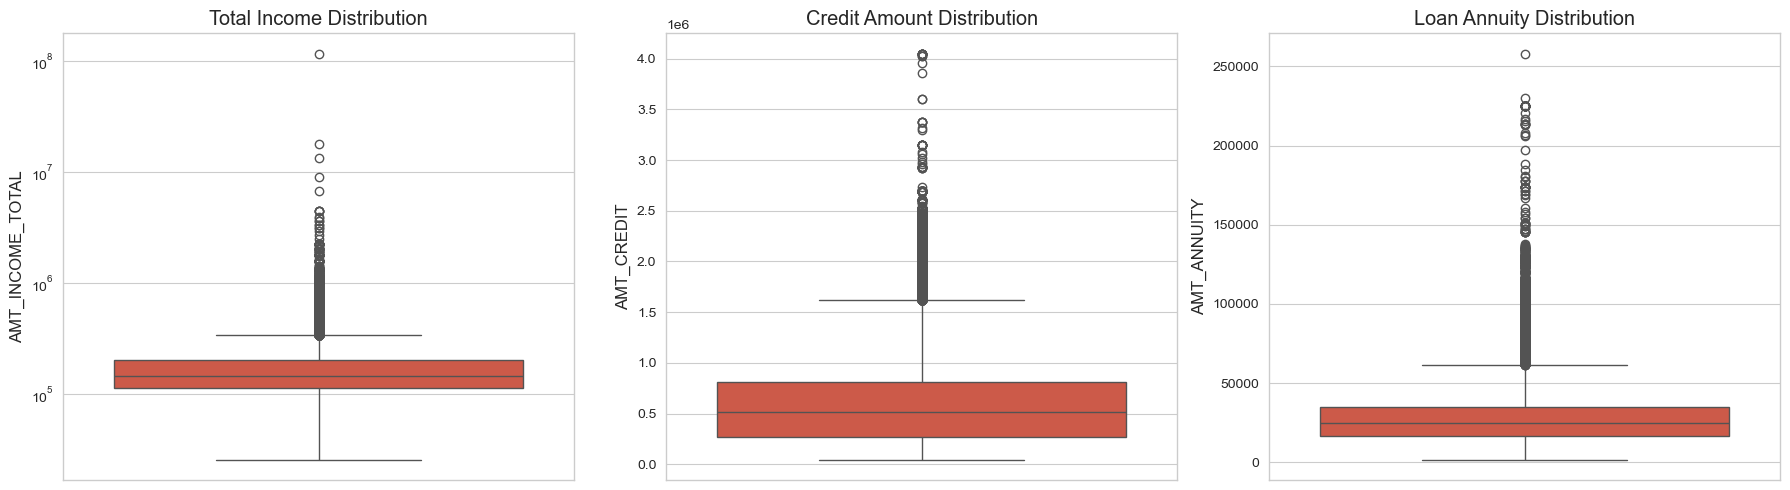

In [7]:
# Plotting box plots for key numerical variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(y=app_df_cleaned['AMT_INCOME_TOTAL'], ax=axes[0])
axes[0].set_title('Total Income Distribution')
axes[0].set_yscale('log') # Use log scale due to large range

sns.boxplot(y=app_df_cleaned['AMT_CREDIT'], ax=axes[1])
axes[1].set_title('Credit Amount Distribution')

sns.boxplot(y=app_df_cleaned['AMT_ANNUITY'], ax=axes[2])
axes[2].set_title('Loan Annuity Distribution')

plt.tight_layout()
plt.show()

Target Variable Distribution:
TARGET
0    282686
1     24825
Name: count, dtype: int64

Imbalance Ratio (Defaulters / Non-Defaulters): 0.0878
Percentage of Defaulters: 8.07%


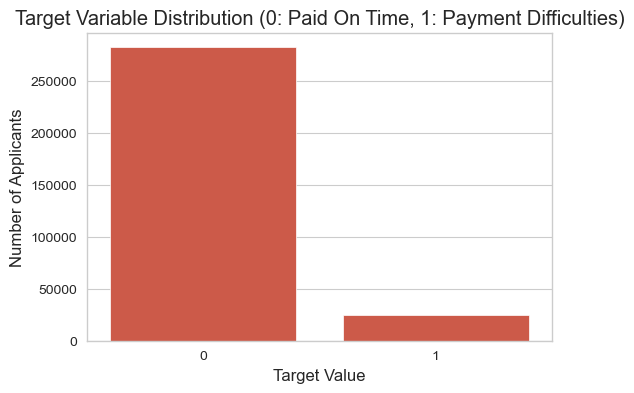

In [8]:
# Calculate imbalance ratio
target_counts = app_df_cleaned['TARGET'].value_counts()
imbalance_ratio = target_counts[1] / target_counts[0]
percentage_default = (target_counts[1] / len(app_df_cleaned)) * 100

print(f"Target Variable Distribution:\n{target_counts}")
print(f"\nImbalance Ratio (Defaulters / Non-Defaulters): {imbalance_ratio:.4f}")
print(f"Percentage of Defaulters: {percentage_default:.2f}%")

# Plot the distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='TARGET', data=app_df_cleaned)
plt.title('Target Variable Distribution (0: Paid On Time, 1: Payment Difficulties)')
plt.xlabel('Target Value')
plt.ylabel('Number of Applicants')
plt.show()

In [9]:
def plot_categorical(var, title):
    # Calculate default rate per category
    df = app_df_cleaned.groupby(var)['TARGET'].value_counts(normalize=True).unstack().fillna(0)
    df = df.sort_values(by=1, ascending=False) # Sort by default rate

    plt.figure(figsize=(10, 5))
    sns.barplot(x=df.index, y=df[1] * 100, palette='viridis')
    plt.title(f'Default Rate by {title}')
    plt.ylabel('Default Rate (%)')
    plt.xlabel(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [10]:
def plot_numerical(var, title):
    plt.figure(figsize=(10, 5))
    sns.histplot(data=app_df_cleaned, x=var, hue='TARGET', kde=True, stat='density', common_norm=False)
    plt.title(f'Distribution of {title} by Target')
    plt.xlabel(title)
    plt.ylabel('Density')
    plt.show()

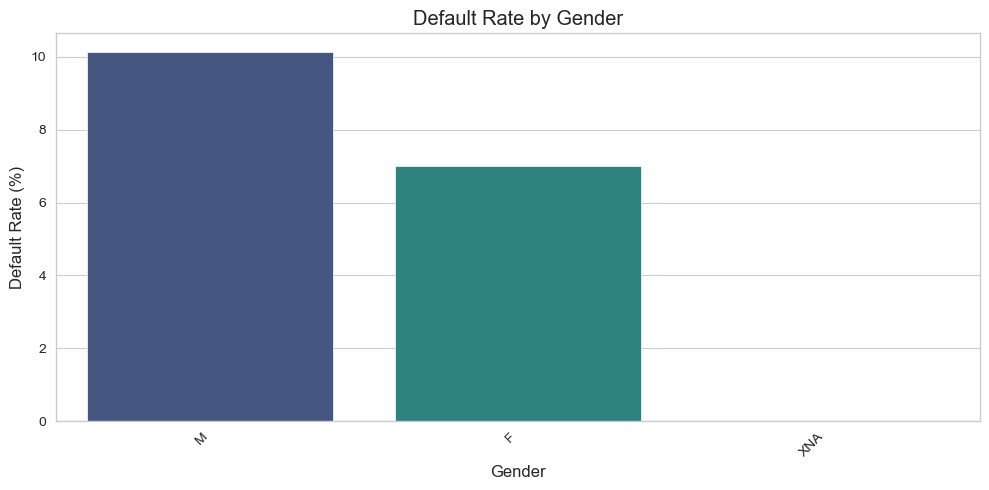

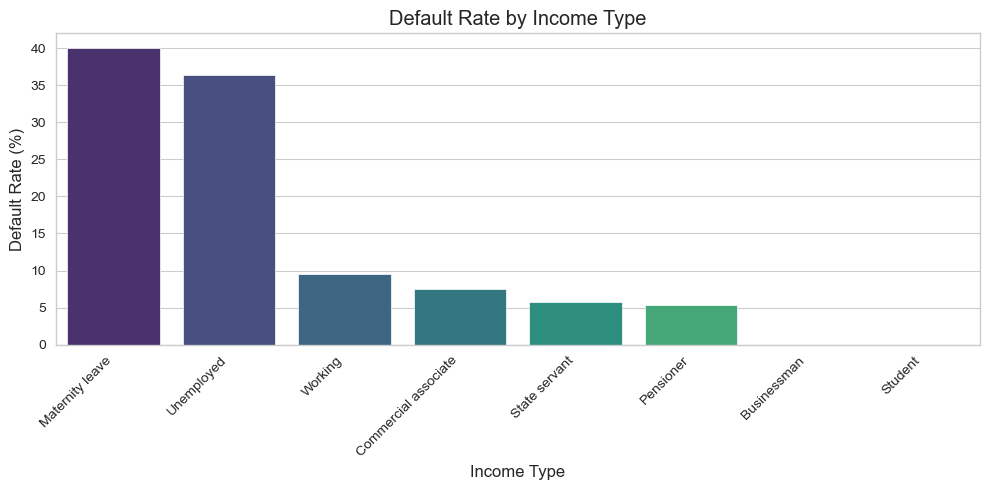

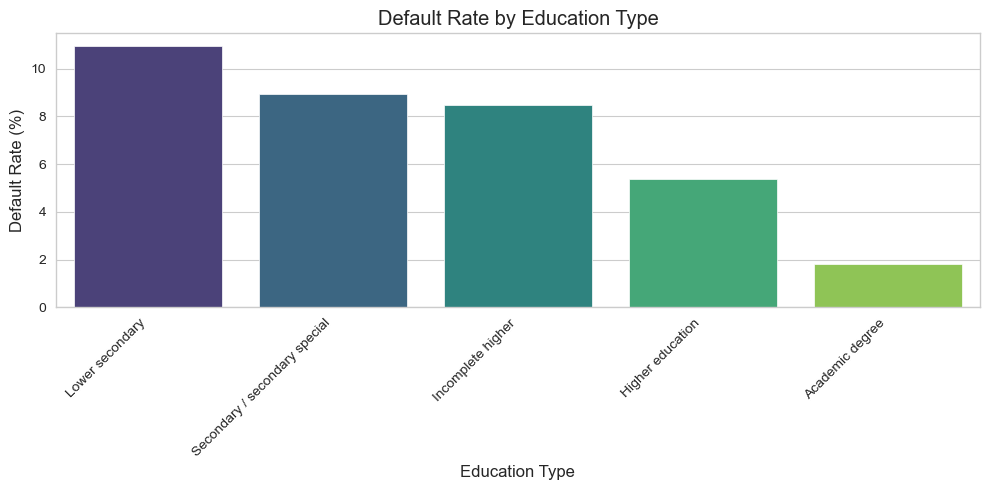

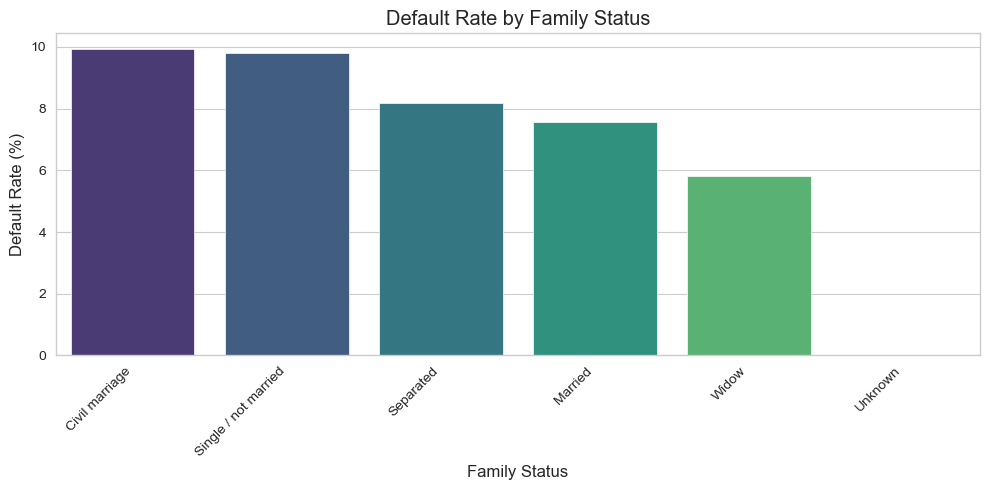

NameError: name 'plot_cathode' is not defined

In [11]:
# Gender
plot_categorical('CODE_GENDER', 'Gender')
# Income Type
plot_categorical('NAME_INCOME_TYPE', 'Income Type')
# Education Type
plot_categorical('NAME_EDUCATION_TYPE', 'Education Type')
# Family Status
plot_categorical('NAME_FAMILY_STATUS', 'Family Status')
# Occupation Type
plot_cathode('OCCUPATION_TYPE', 'Occupation Type')
# Contract Type
plot_categorical('NAME_CONTRACT_TYPE', 'Contract Type')

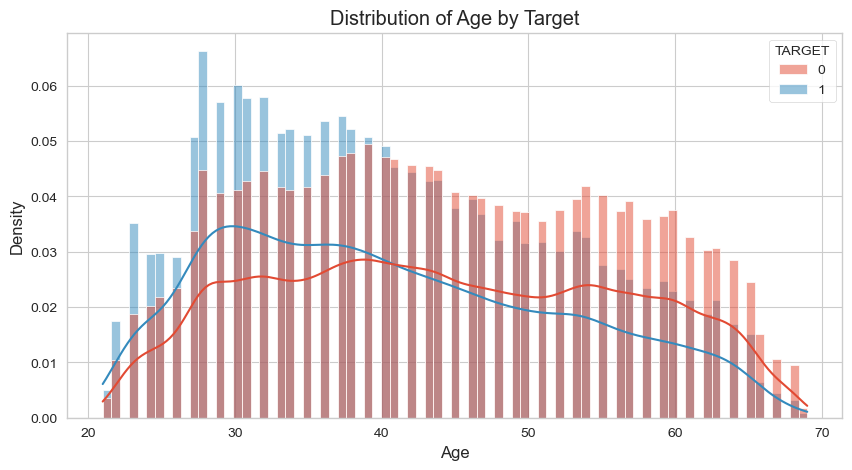

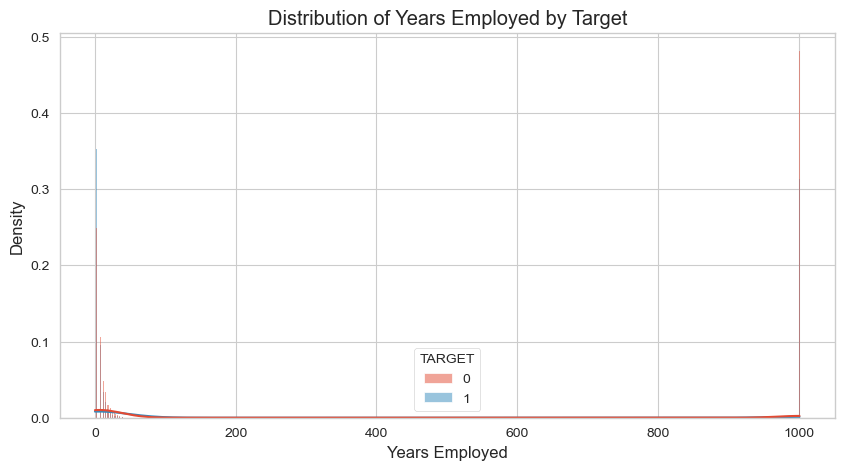

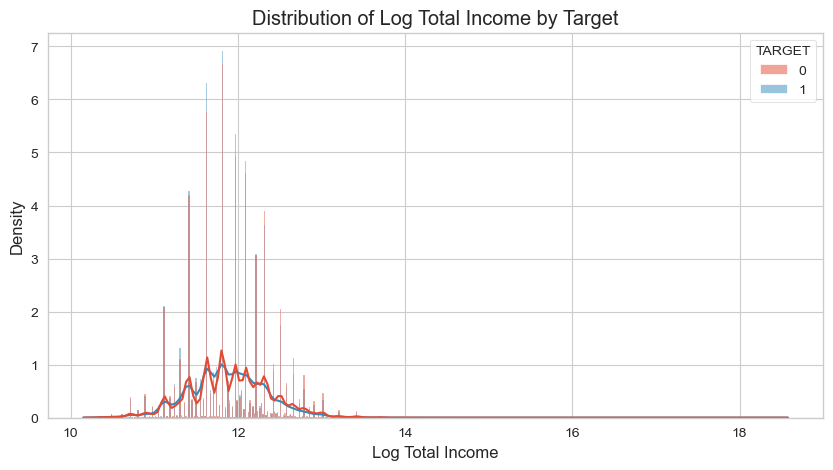

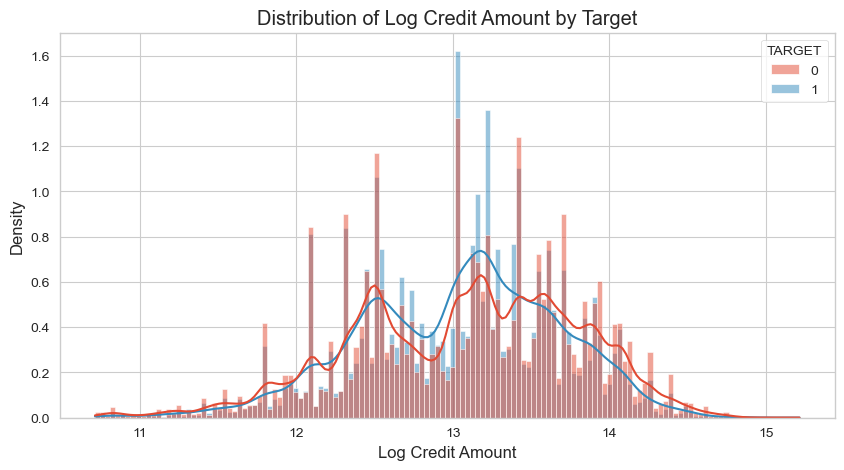

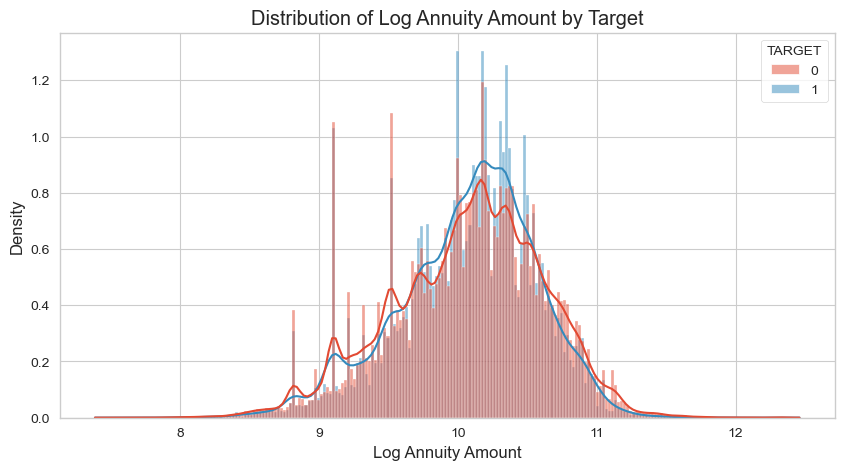

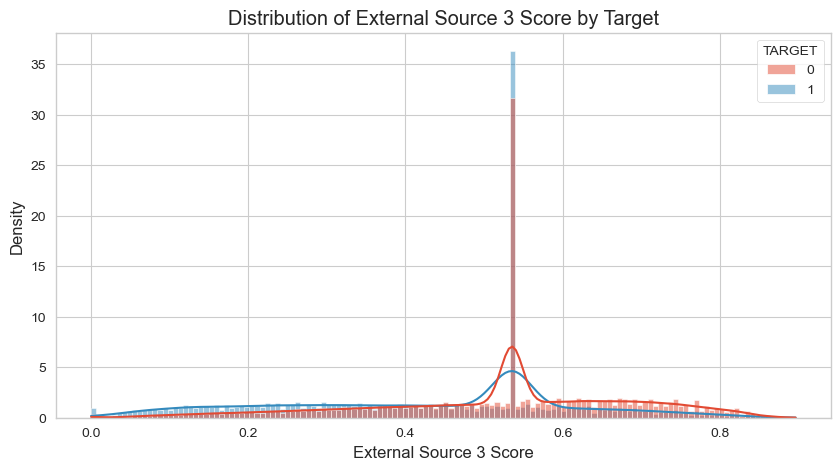

In [12]:
# Age
plot_numerical('AGE', 'Age')
# Years Employed
plot_numerical('YEARS_EMPLOYED', 'Years Employed')
# Total Income (Log Scale)
app_df_cleaned['LOG_AMT_INCOME_TOTAL'] = np.log1p(app_df_cleaned['AMT_INCOME_TOTAL'])
plot_numerical('LOG_AMT_INCOME_TOTAL', 'Log Total Income')
# Credit Amount (Log Scale)
app_df_cleaned['LOG_AMT_CREDIT'] = np.log1p(app_df_cleaned['AMT_CREDIT'])
plot_numerical('LOG_AMT_CREDIT', 'Log Credit Amount')
# Annuity Amount (Log Scale)
app_df_cleaned['LOG_AMT_ANNUITY'] = np.log1p(app_df_cleaned['AMT_ANNUITY'])
plot_numerical('LOG_AMT_ANNUITY', 'Log Annuity Amount')
# EXT_SOURCE_3
plot_numerical('EXT_SOURCE_3', 'External Source 3 Score')

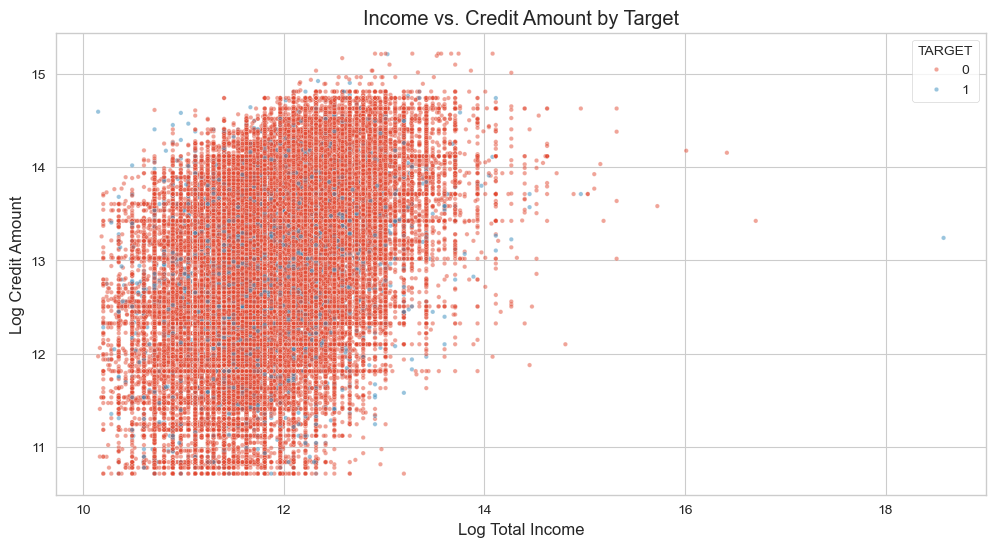

In [13]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='LOG_AMT_INCOME_TOTAL', y='LOG_AMT_CREDIT', hue='TARGET', data=app_df_cleaned, alpha=0.5, s=10)
plt.title('Income vs. Credit Amount by Target')
plt.xlabel('Log Total Income')
plt.ylabel('Log Credit Amount')
plt.show()

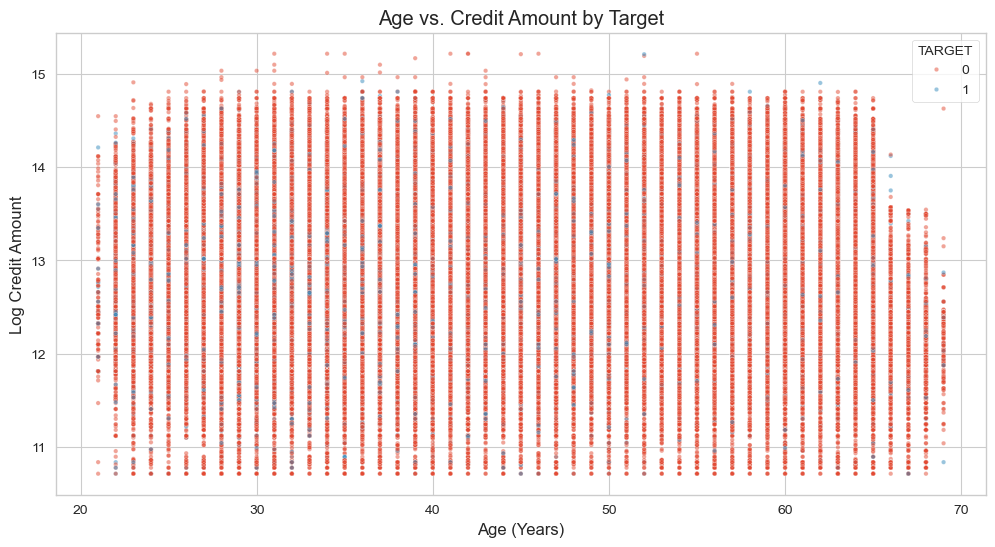

In [14]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='AGE', y='LOG_AMT_CREDIT', hue='TARGET', data=app_df_cleaned, alpha=0.5, s=10)
plt.title('Age vs. Credit Amount by Target')
plt.xlabel('Age (Years)')
plt.ylabel('Log Credit Amount')
plt.show()

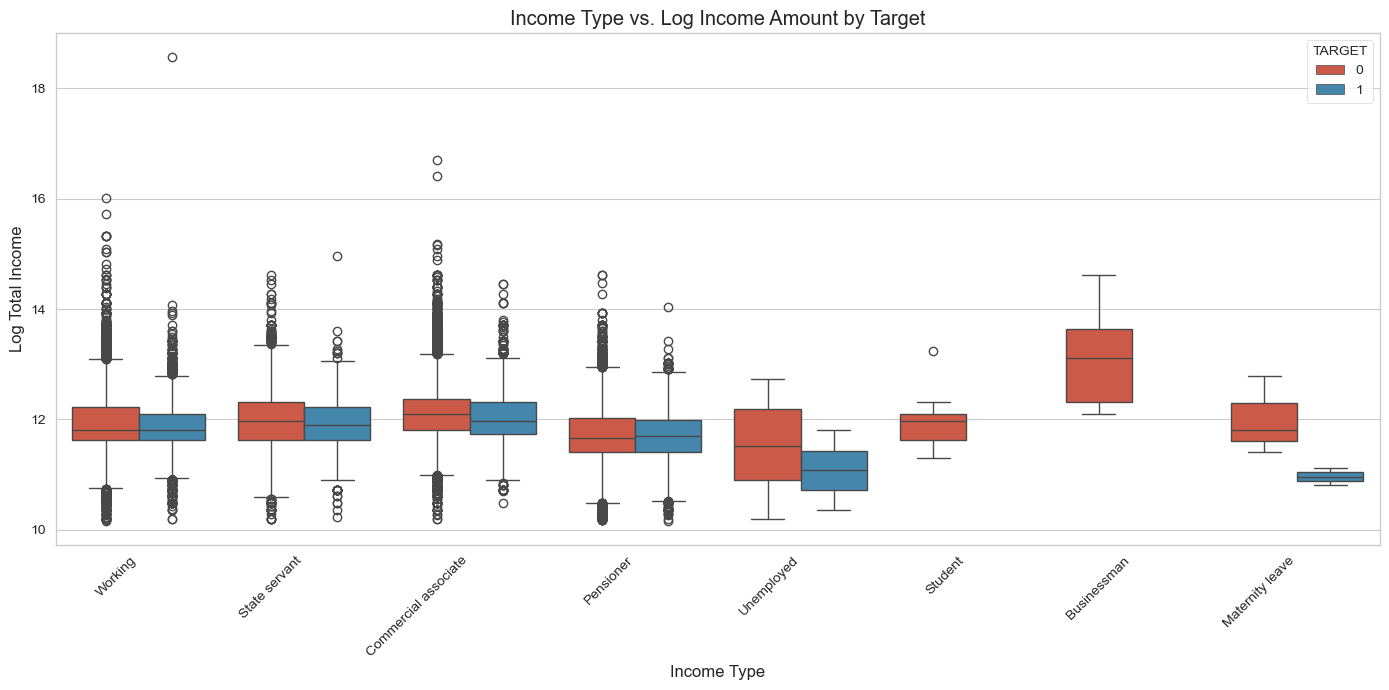

In [15]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='NAME_INCOME_TYPE', y='LOG_AMT_INCOME_TOTAL', hue='TARGET', data=app_df_cleaned)
plt.title('Income Type vs. Log Income Amount by Target')
plt.xlabel('Income Type')
plt.ylabel('Log Total Income')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
# Select numerical columns (excluding IDs and Target)
numerical_cols = app_df_cleaned.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('SK_ID_CURR')
numerical_cols.remove('TARGET')
# Remove log columns if we want original ones, or keep them. Let's keep original for now.
numerical_cols = [col for col in numerical_cols if 'LOG_' not in col]
# Also remove age and years_employed if keeping original days
if 'AGE' in numerical_cols: numerical_cols.remove('AGE')
if 'YEARS_EMPLOYED' in numerical_cols: numerical_cols.remove('YEARS_EMPLOYED')
# Add back the original DAYS_BIRTH/EMPLOYED if needed, but age/years is better. Let's make a new list.
corr_cols = app_df_cleaned.select_dtypes(include=np.number).columns.tolist()
corr_cols.remove('SK_ID_CURR')
corr_cols.remove('TARGET')

# Separate dataframes
df_target_0 = app_df_cleaned[app_df_cleaned['TARGET'] == 0]
df_target_1 = app_df_cleaned[app_df_cleaned['TARGET'] == 1]

# Calculate correlations
corr_0 = df_target_0[corr_cols].corr().abs()
corr_1 = df_target_1[corr_cols].corr().abs()

# Function to get top N correlations
def get_top_correlations(corr_matrix, n=10):
    unstacked = corr_matrix.unstack()
    sorted_corr = unstacked.sort_values(kind="quicksort", ascending=False)
    # Remove self-correlations (where value is 1)
    sorted_corr = sorted_corr[sorted_corr != 1.0]
    # Return top N (divide by 2 because each pair appears twice)
    return sorted_corr.head(n * 2)[::2] # Get 2N and pick every second one

# Get top 10 correlations
top_corr_0 = get_top_correlations(corr_0, 10)
top_corr_1 = get_top_correlations(corr_1, 10)

print("--- Top 10 Correlations for Non-Defaulters (Target = 0) ---")
print(top_corr_0)
print("\n--- Top 10 Correlations for Defaulters (Target = 1) ---")
print(top_corr_1)

--- Top 10 Correlations for Non-Defaulters (Target = 0) ---
YEARS_EMPLOYED              FLAG_EMP_PHONE                 0.999756
OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.998508
AMT_CREDIT                  AMT_GOODS_PRICE                0.987250
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.950149
AMT_ANNUITY                 LOG_AMT_ANNUITY                0.929844
AMT_CREDIT                  LOG_AMT_CREDIT                 0.919647
LOG_AMT_CREDIT              AMT_GOODS_PRICE                0.901748
CNT_CHILDREN                CNT_FAM_MEMBERS                0.878571
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.861861
DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE       0.859332
dtype: float64

--- Top 10 Correlations for Defaulters (Target = 1) ---
YEARS_EMPLOYED               FLAG_EMP_PHONE                 0.999705
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998269
AMT_CREDIT                   AMT_GOODS_PRICE      

In [17]:
# --- End of Notebook ---